In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [6]:
import pymysql

conn = pymysql.connect(
    host='localhost',
    user='root',
    password='0711',
    database='agri_db'
)

df = pd.read_sql("SELECT * FROM agricultural", conn)
print(df.head())
conn.close()


C:\Users\gnana\AppData\Local\Temp\ipykernel_17452\605745745.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM agricultural", conn)


   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        409.0                  747.71                  50.0   
2                        468.0                  841.27                  53.7   
3                        400.8                  711.40                  49.4   
4                        473.6                  828.55                  44.2   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARC

In [7]:
df.isnull().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [8]:

top7_rice = df.groupby('State Name')['RICE PRODUCTION (1000 tons)'].sum().sort_values(ascending=False).head(7)


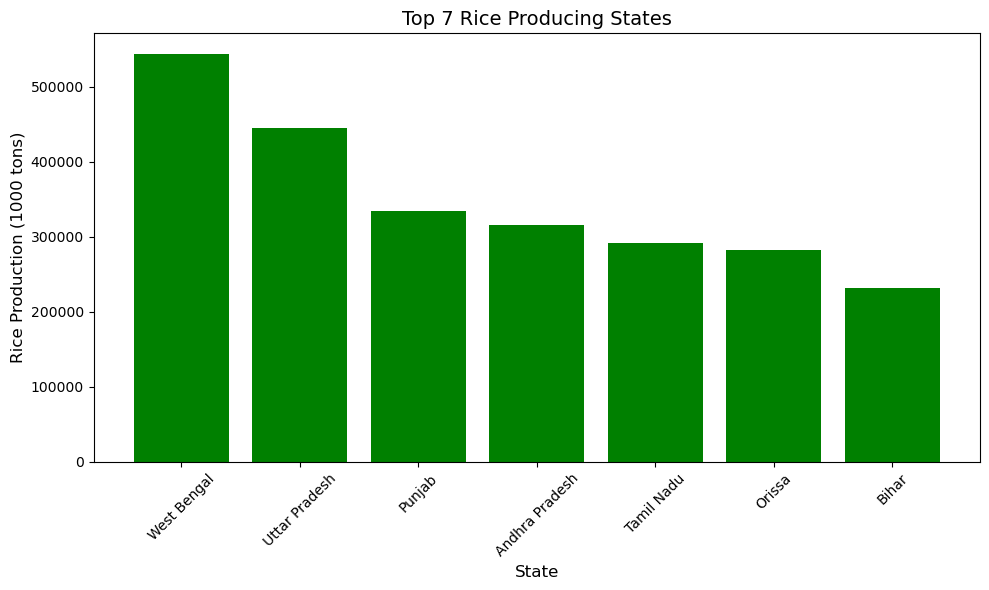

In [9]:
plt.figure(figsize=(10,6))
plt.bar(top7_rice.index, top7_rice.values, color='green')
plt.title('Top 7 Rice Producing States', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Rice Production (1000 tons)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
top5_Wheat = df.groupby('State Name')['WHEAT PRODUCTION (1000 tons)'].sum().sort_values(ascending=False).head(5)


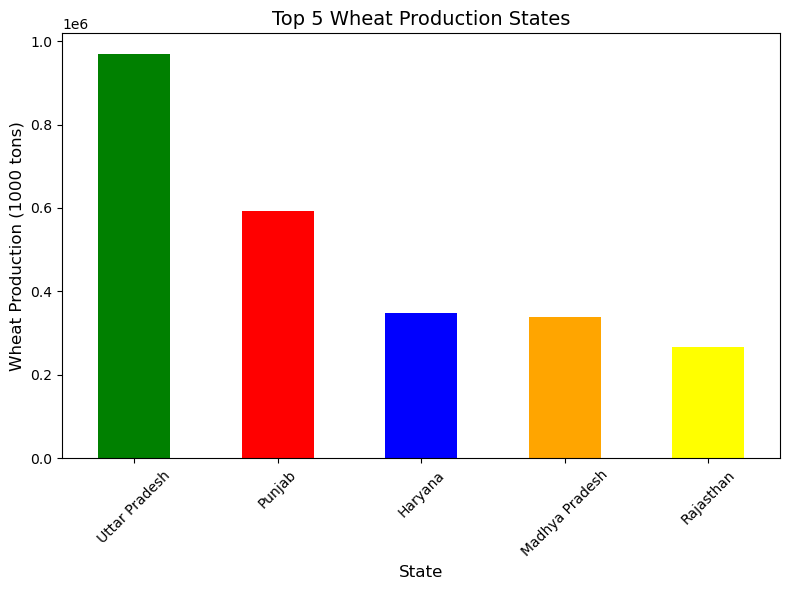

In [11]:
plt.figure(figsize=(8,6))
top5_Wheat.plot(kind='bar', color=['green','red','blue','orange','yellow'])
plt.title('Top 5 Wheat Production States', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Wheat Production (1000 tons)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

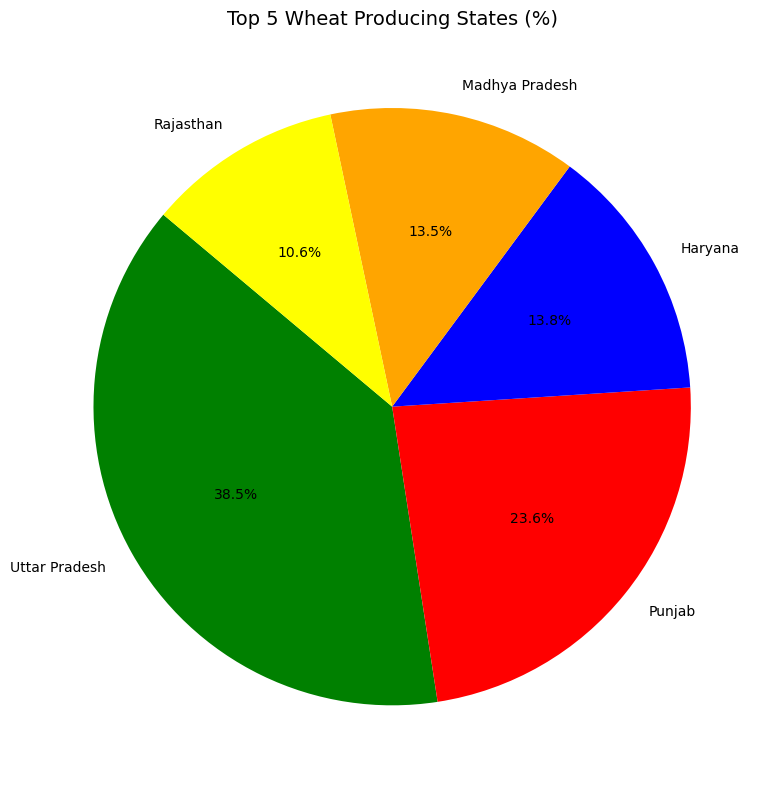

In [12]:
plt.figure(figsize=(8,8))
plt.pie(
    top5_Wheat.values, 
    labels=top5_Wheat.index, 
    autopct='%1.1f%%',   
    startangle=140,      
    colors=['green','red','blue','orange','yellow']  
)
plt.title('Top 5 Wheat Producing States (%)', fontsize=14)
plt.tight_layout()
plt.show()

In [13]:
top5_OILSEEDS = df.groupby('State Name')['OILSEEDS PRODUCTION (1000 tons)'].sum().sort_values(ascending=False).head(5)


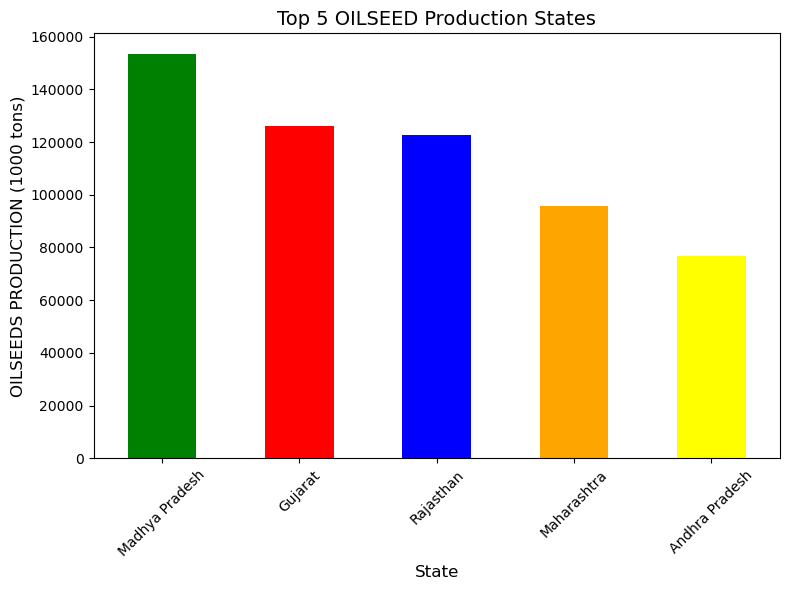

In [14]:
plt.figure(figsize=(8,6))
top5_OILSEEDS.plot(kind='bar', color=['green','red','blue','orange','yellow'])
plt.title('Top 5 OILSEED Production States', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('OILSEEDS PRODUCTION (1000 tons)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
top5_SUNFLOWR = df.groupby('State Name')['SUNFLOWER PRODUCTION (1000 tons)'].sum().sort_values(ascending=False).head(5)


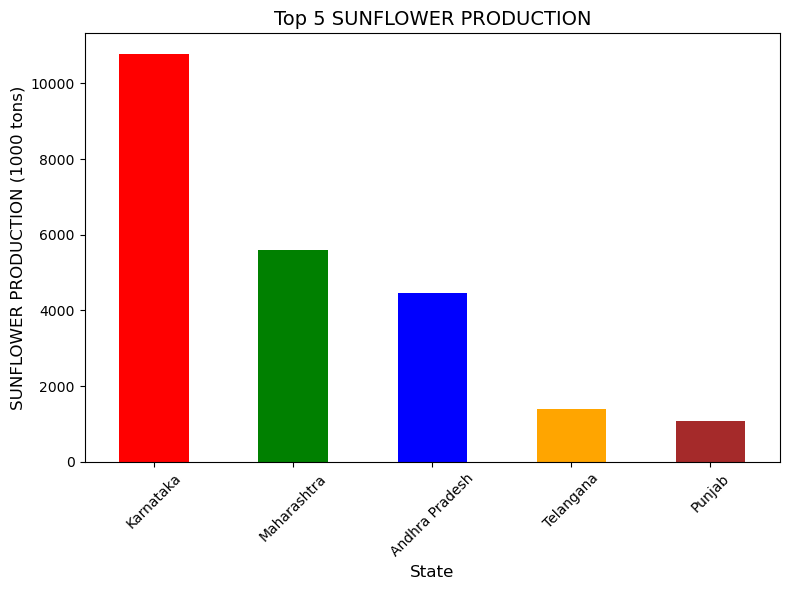

In [16]:
plt.figure(figsize=(8,6))
top5_SUNFLOWR.plot(kind='bar', color=['red','green','blue','orange','brown'])
plt.title('Top 5 SUNFLOWER PRODUCTION', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('SUNFLOWER PRODUCTION (1000 tons)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
Last_50years_SUGARCANE = df.groupby('Year')['SUGARCANE PRODUCTION (1000 tons)'].sum().sort_index().tail(50)

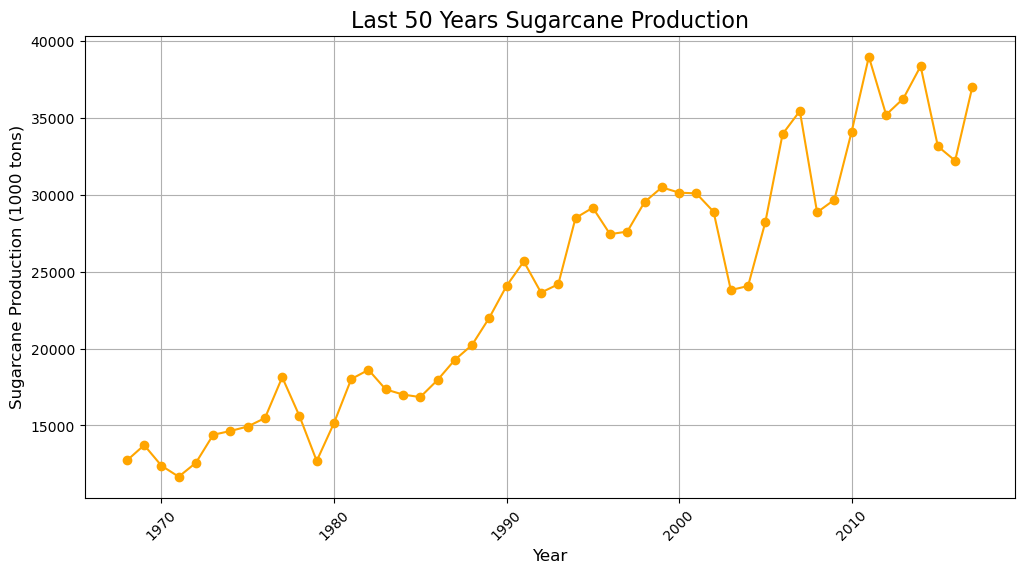

In [18]:
plt.figure(figsize=(12,6))
plt.plot(Last_50years_SUGARCANE.index, Last_50years_SUGARCANE.values, marker='o', linestyle='-', color='orange')

plt.title("Last 50 Years Sugarcane Production", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sugarcane Production (1000 tons)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [19]:
last_50_years = df.groupby('Year')[['RICE PRODUCTION (1000 tons)','WHEAT PRODUCTION (1000 tons)']].sum().sort_index().tail(50)

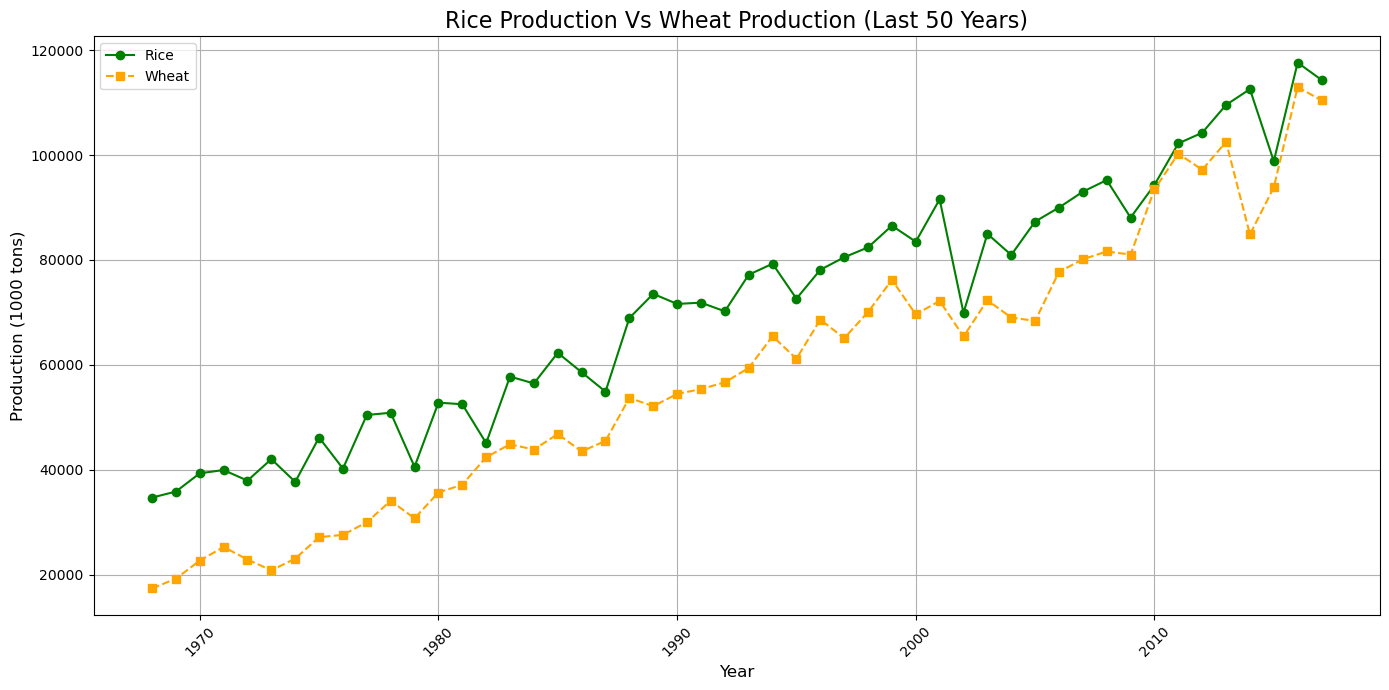

In [20]:
plt.figure(figsize=(14,7))
plt.plot(last_50_years.index, last_50_years['RICE PRODUCTION (1000 tons)'], marker='o', linestyle='-', color='green', label='Rice')
plt.plot(last_50_years.index, last_50_years['WHEAT PRODUCTION (1000 tons)'], marker='s', linestyle='--', color='orange', label='Wheat')

plt.title("Rice Production Vs Wheat Production (Last 50 Years)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Production (1000 tons)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
wb_data = df[df['State Name'] == 'West Bengal']



In [23]:
wb_rice = wb_data.groupby('State Name')['RICE PRODUCTION (1000 tons)'].sum().sort_values(ascending=False)

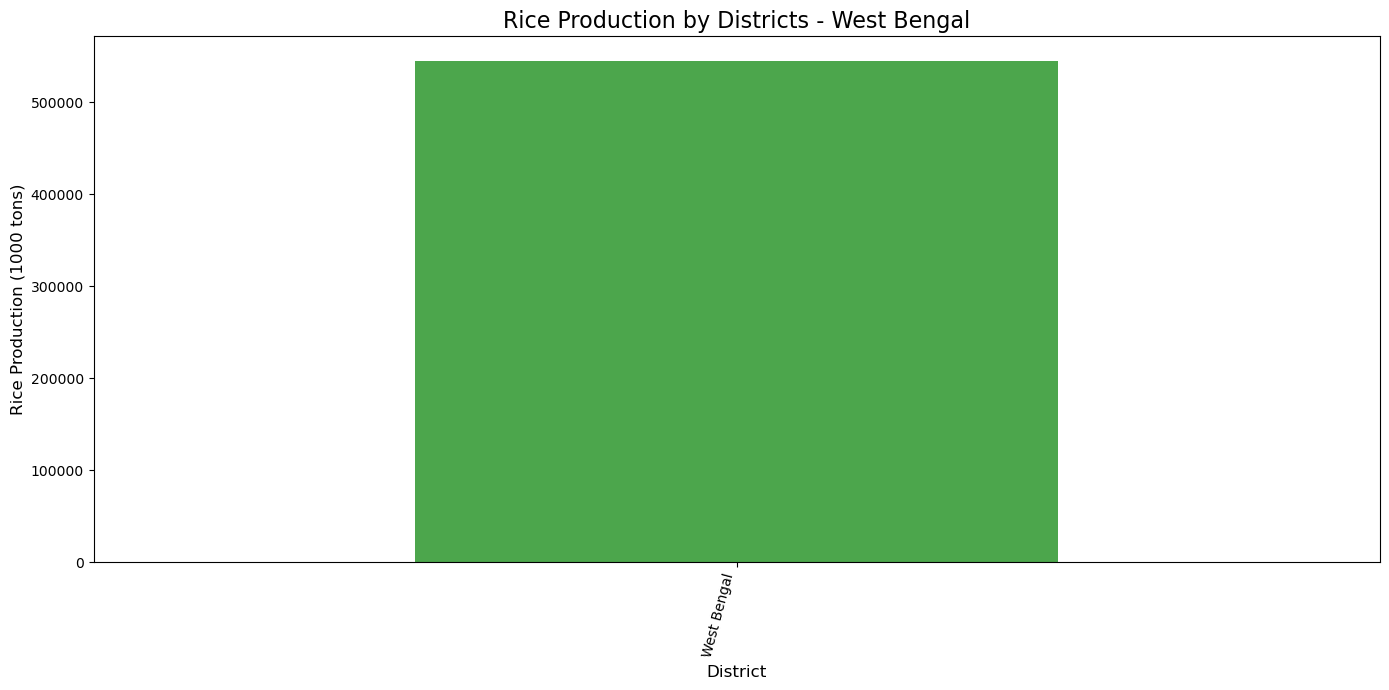

In [28]:
plt.figure(figsize=(14,7))
wb_rice.plot(kind='bar', color='green', alpha=0.7)

plt.title("Rice Production by Districts - West Bengal", fontsize=16)
plt.xlabel("District", fontsize=12)
plt.ylabel("Rice Production (1000 tons)", fontsize=12)
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

In [29]:
up_data = df[df['State Name'] == 'Uttar Pradesh']

In [31]:
up_wheat = df.groupby('Year')['WHEAT PRODUCTION (1000 tons)'].sum()

In [32]:
top10_wheat = up_wheat.sort_values(ascending=False).head(10)

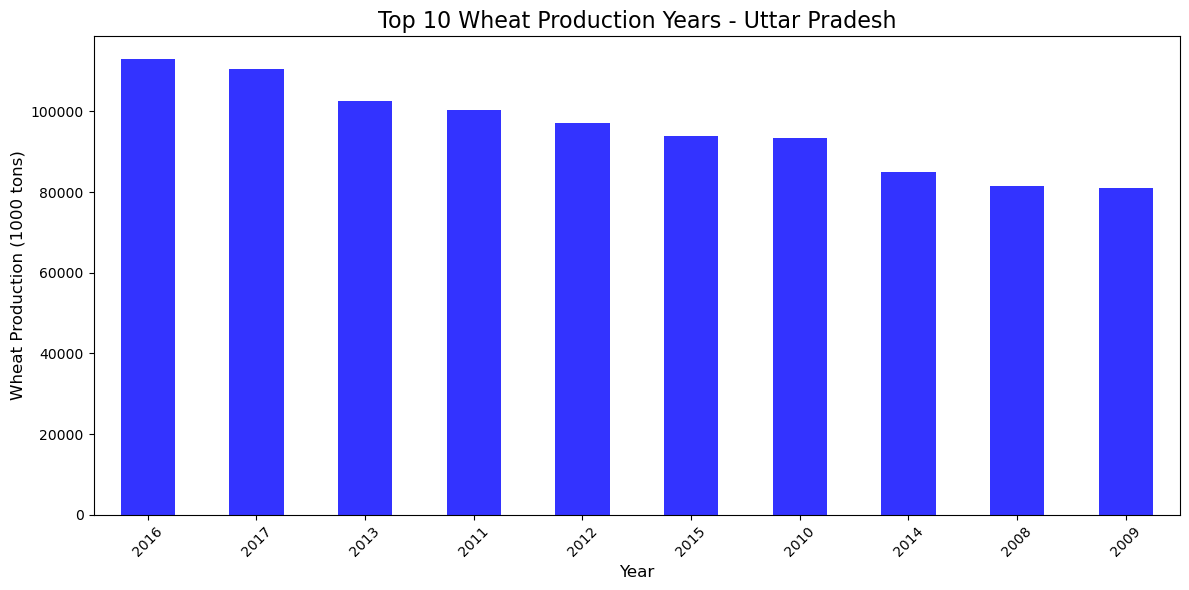

In [35]:
plt.figure(figsize=(12,6))
top10_wheat.plot(kind='bar', color='blue', alpha=0.8)

plt.title("Top 10 Wheat Production Years - Uttar Pradesh", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Wheat Production (1000 tons)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
last_50_millet = (df.groupby('Year')['PEARL MILLET PRODUCTION (1000 tons)'].sum().sort_index().tail(50))

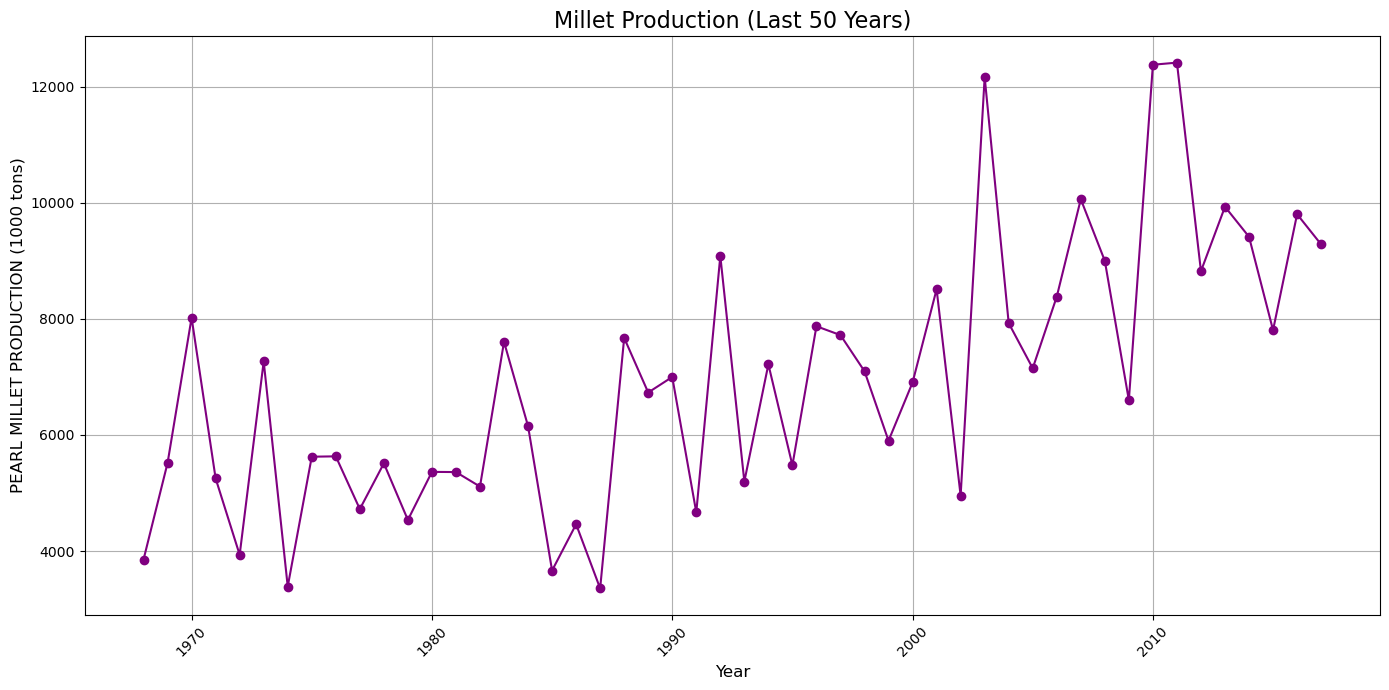

In [38]:
plt.figure(figsize=(14,7))
plt.plot(last_50_millet.index, last_50_millet.values, marker='o', linestyle='-', color='purple')

plt.title("Millet Production (Last 50 Years)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("PEARL MILLET PRODUCTION (1000 tons)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
sorghum_region = (df.groupby('Dist Name')[['KHARIF SORGHUM PRODUCTION (1000 tons)', 'SORGHUM PRODUCTION (1000 tons)']]
    .sum().sort_values(by='KHARIF SORGHUM PRODUCTION (1000 tons)', ascending=False))

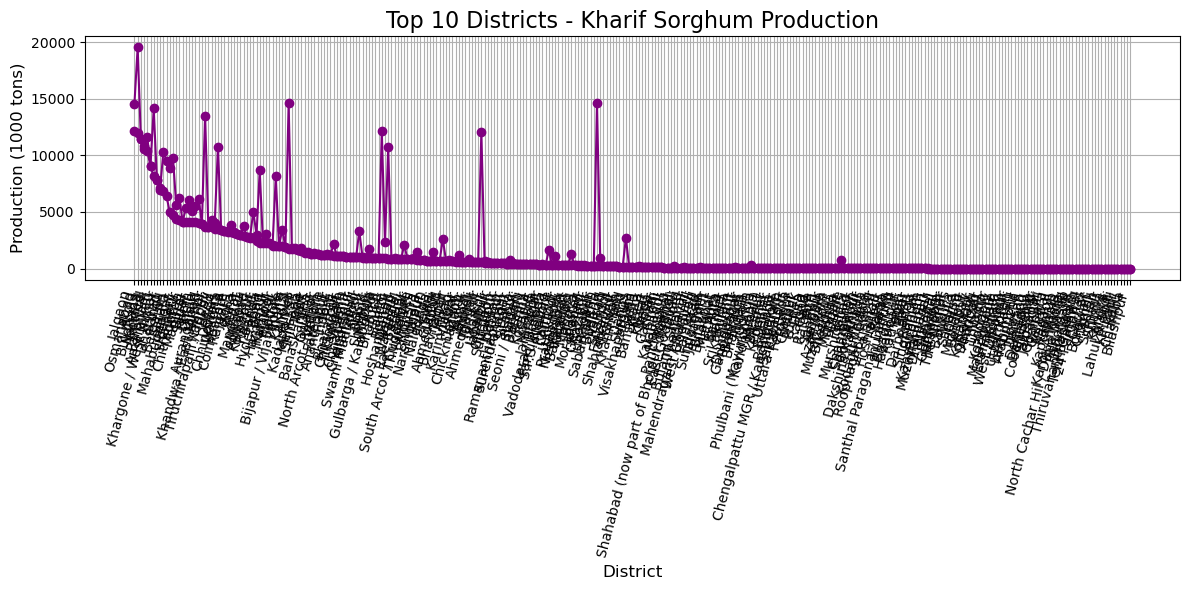

In [53]:
plt.figure(figsize=(12,6))
plt.plot(sorghum_region.index, sorghum_region.values, marker='o', linestyle='-', color='purple')

plt.title("Top 10 Districts - Kharif Sorghum Production", fontsize=16)
plt.xlabel("District", fontsize=12)
plt.ylabel("Production (1000 tons)", fontsize=12)
plt.xticks(rotation=75, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
top7_groundnut = (df.groupby('State Name')['GROUNDNUT PRODUCTION (1000 tons)'].sum().sort_index().tail(7))

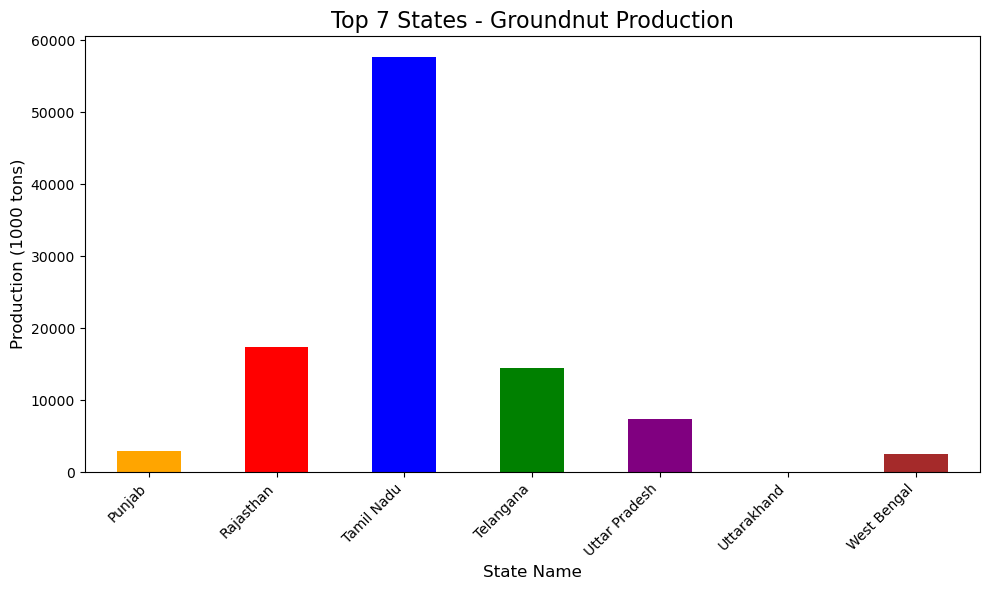

In [59]:
plt.figure(figsize=(10,6))
top7_groundnut.plot(kind='bar', color=['orange','red','blue','green','purple','yellow','brown','black'])
plt.title("Top 7 States - Groundnut Production", fontsize=16)
plt.xlabel("State Name", fontsize=12)
plt.ylabel("Production (1000 tons)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [60]:
top5_soybean = df.groupby('State Name')['SOYABEAN PRODUCTION (1000 tons)'].sum()\
                 .sort_values(ascending=False).head(5)
yield_soybean = df.groupby('State Name')['SOYABEAN YIELD (Kg per ha)'].mean().loc[top5_soybean.index]

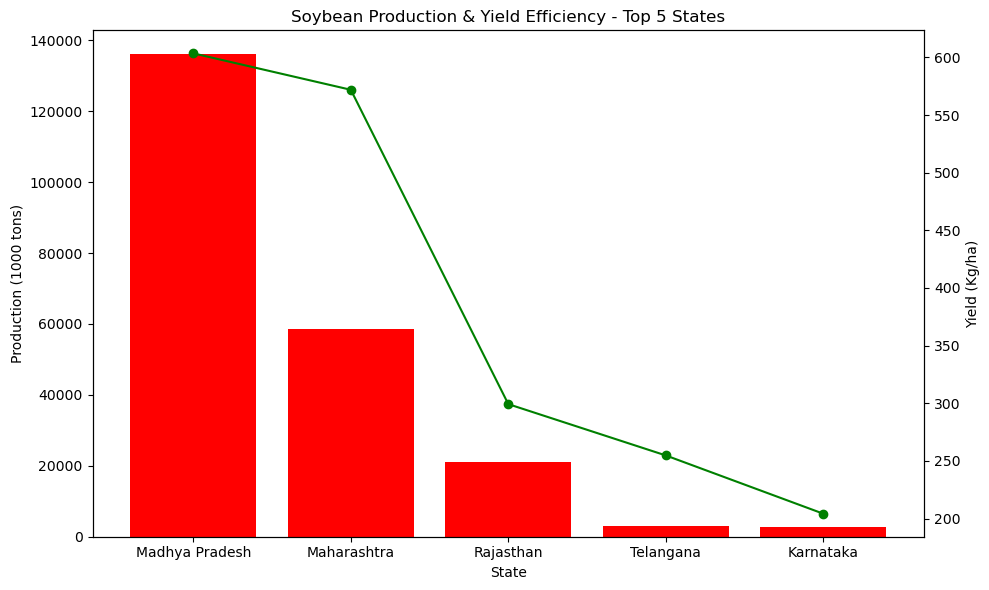

In [66]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.bar(top5_soybean.index, top5_soybean.values, color='red', label='Production')
ax1.set_xlabel('State')
ax1.set_ylabel('Production (1000 tons)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(top5_soybean.index, yield_soybean.values, color='green', marker='o', label='Yield')
ax2.set_ylabel('Yield (Kg/ha)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Soybean Production & Yield Efficiency - Top 5 States')
plt.tight_layout()
plt.show()

In [67]:
oilseeds = [
    'GROUNDNUT PRODUCTION (1000 tons)',
    'SOYABEAN PRODUCTION (1000 tons)',
    'SESAMUM PRODUCTION (1000 tons)',
    'RAPESEED AND MUSTARD PRODUCTION (1000 tons)',
    'SAFFLOWER PRODUCTION (1000 tons)',
    'CASTOR PRODUCTION (1000 tons)',
    'LINSEED PRODUCTION (1000 tons)',
    'SUNFLOWER PRODUCTION (1000 tons)'
]

oilseed_states = df.groupby('State Name')[oilseeds].sum()

In [68]:
oilseed_states['Total'] = oilseed_states.sum(axis=1)
top_states = oilseed_states.sort_values(by= 'Total', ascending=False).head(7)
top_states = top_states.drop(columns='Total')

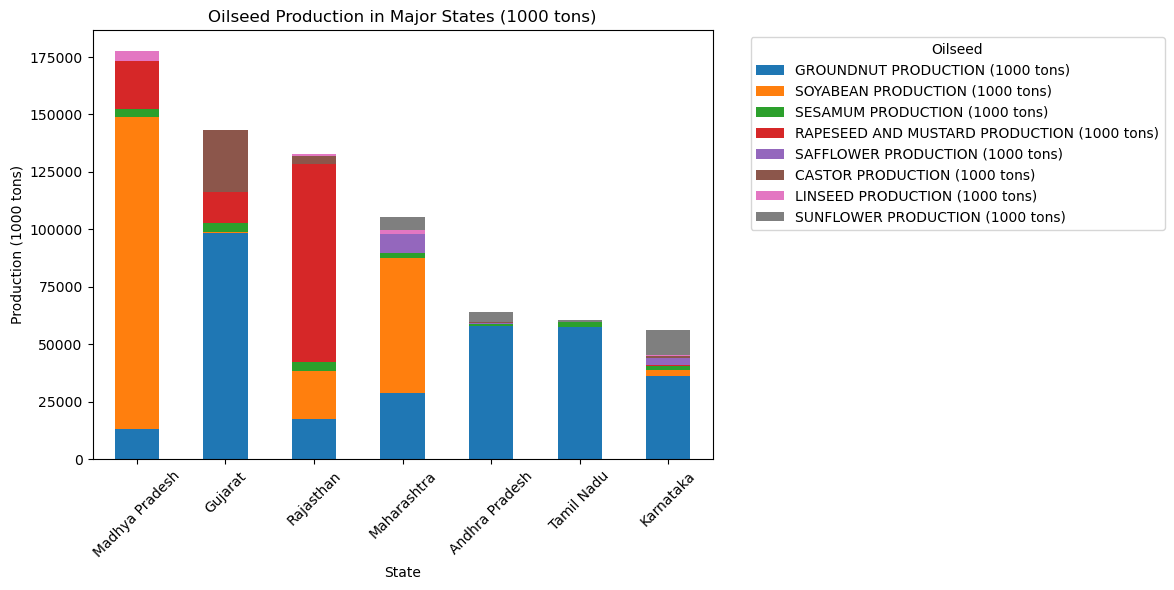

In [69]:
top_states.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Oilseed Production in Major States (1000 tons)")
plt.xlabel("State")
plt.ylabel("Production (1000 tons)")
plt.xticks(rotation=45)
plt.legend(title='Oilseed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

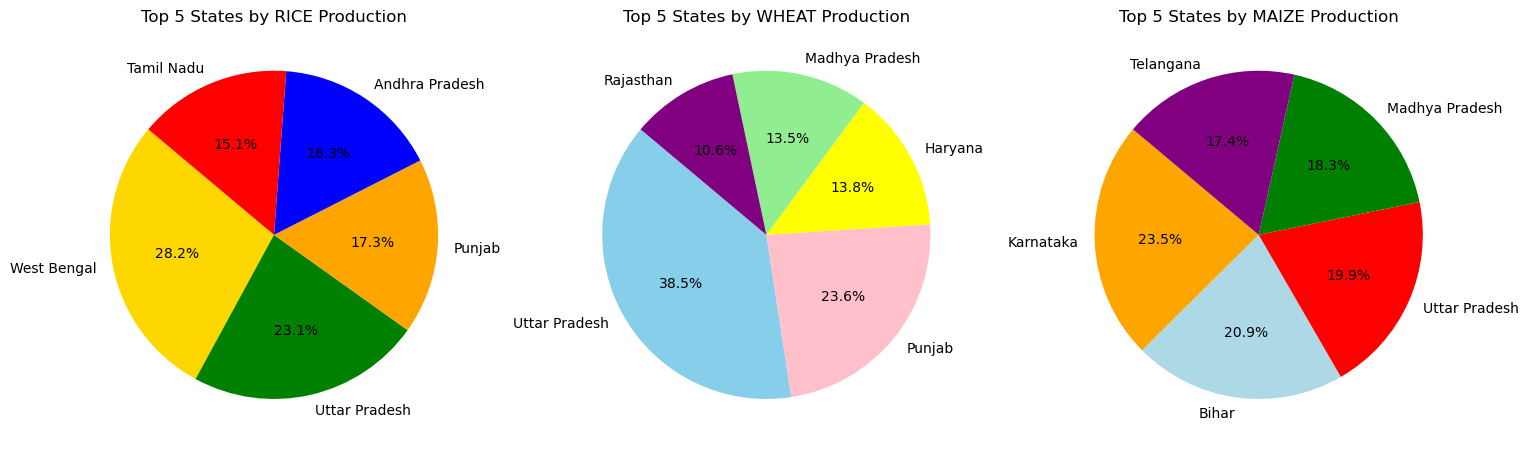

In [76]:
crops = ['RICE', 'WHEAT', 'MAIZE']
colors = [['gold','green','orange','blue','red'],
          ['skyblue','pink','yellow','lightgreen','purple'],
          ['orange','lightblue','red','green','purple']]

plt.figure(figsize=(18,6))

for i, crop in enumerate(crops):
    top5 = df.groupby('State Name')[f'{crop} PRODUCTION (1000 tons)']\
             .sum().sort_values(ascending=False).head(5)
    
    plt.subplot(1, 3, i+1)
    plt.pie(top5.values, labels=top5.index, autopct='%1.1f%%', startangle=140, colors=colors[i])
    plt.title(f'Top 5 States by {crop} Production')

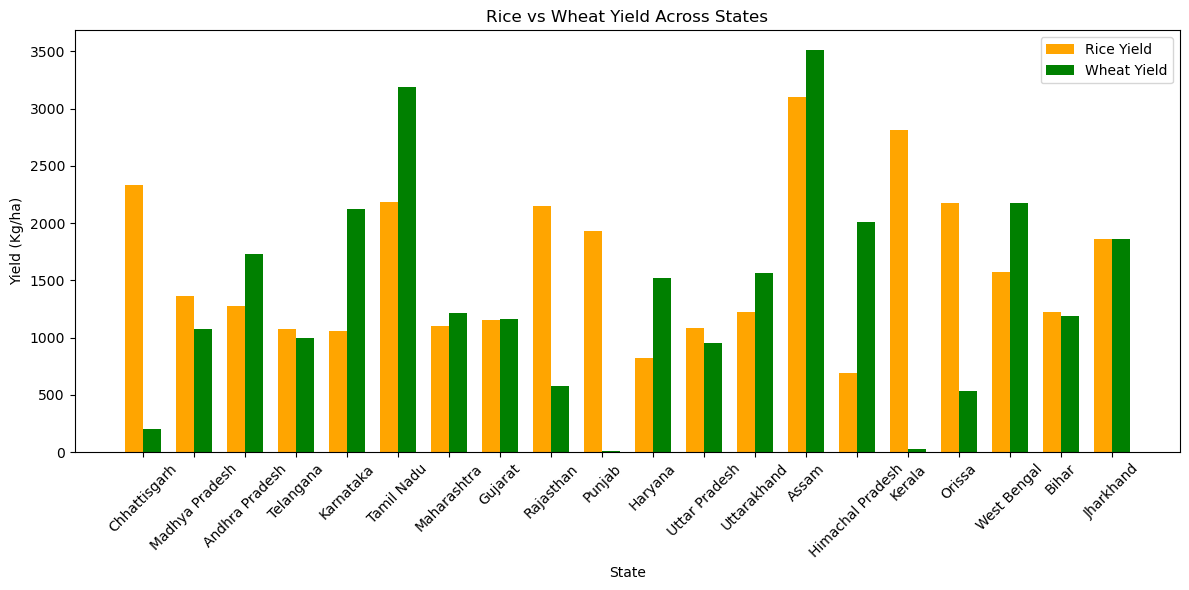

In [80]:
states = df['State Name'].unique()
rice_yield = df.groupby('State Name')['RICE YIELD (Kg per ha)'].mean()
wheat_yield = df.groupby('State Name')['WHEAT YIELD (Kg per ha)'].mean()

x = np.arange(len(states))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, rice_yield, width, label='Rice Yield', color='orange')
plt.bar(x + width/2, wheat_yield, width, label='Wheat Yield', color='green')
plt.xlabel('State')
plt.ylabel('Yield (Kg/ha)')
plt.title('Rice vs Wheat Yield Across States')
plt.xticks(x, states, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()